# Iris Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.drop(["Id"],axis=1,inplace=True)

In [4]:
df["Species"].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [5]:
df["Species"] = df["Species"].replace({"Iris-setosa":0,"Iris-virginica":1,"Iris-versicolor":2})
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


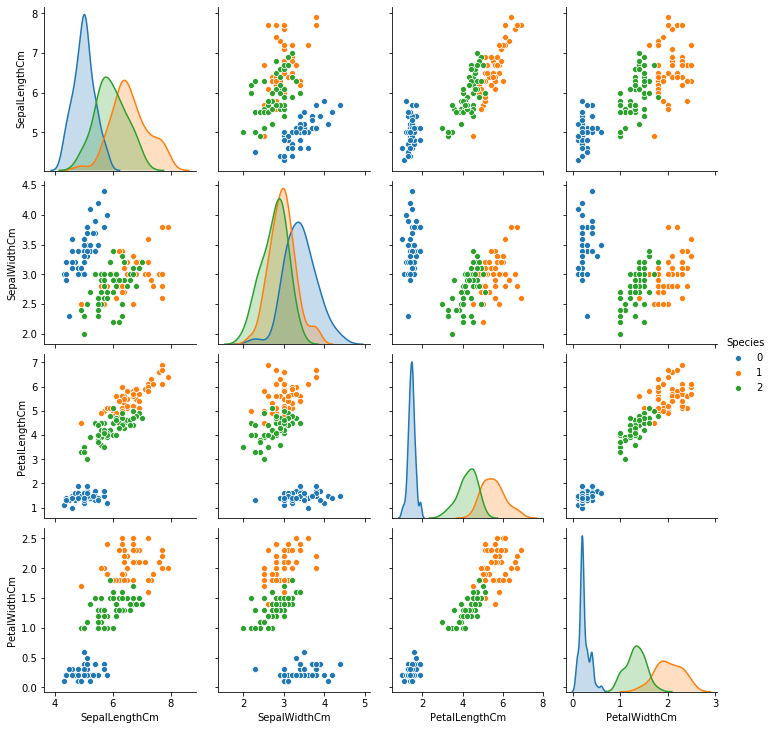

In [7]:
sns.pairplot(df,hue="Species");

In [8]:
columns = list(df.columns)
features = columns[:-1]

In [9]:
X = df[features]
y = df["Species"]

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#### Splitting the data into train and test sets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

## Logistic Regression

In [23]:
log_clf = LogisticRegression()
log_clf.fit(X_train,y_train)
log_predictions_train = log_clf.predict(X_train)
log_predictions_test = log_clf.predict(X_test)

print("Accuracy of Logistic Regression train set : ",accuracy_score(y_train,log_predictions_train))
print("Accuracy of Logistic Regression test set : ",accuracy_score(y_test,log_predictions_test))

Accuracy of Logistic Regression train set :  0.9666666666666667
Accuracy of Logistic Regression test set :  1.0


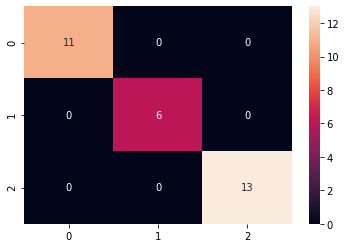

In [24]:
sns.heatmap(confusion_matrix(y_test,log_predictions_test),annot=True);

In [26]:
print(classification_report(y_test,log_predictions_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Decision Tree Classifier

In [29]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc_predictions_train = dtc.predict(X_train)
dtc_predictions_test = dtc.predict(X_test)
print("Accuracy of Decision Tree Classifier train set : ",accuracy_score(y_train,dtc_predictions_train))
print("Accuracy of Decision Tree Classifier test set : ",accuracy_score(y_test,dtc_predictions_test))

Accuracy of Decision Tree Classifier train set :  1.0
Accuracy of Decision Tree Classifier test set :  1.0


## KNN Classifier

In [31]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
knn_predictions_train = knn.predict(X_train)
knn_predictions_test = knn.predict(X_test)
print("Accuracy of KNN train set : ",accuracy_score(y_train,knn_predictions_train))
print("Accuracy of KNN test set : ",accuracy_score(y_test,knn_predictions_test))

Accuracy of KNN train set :  0.95
Accuracy of KNN test set :  0.9666666666666667


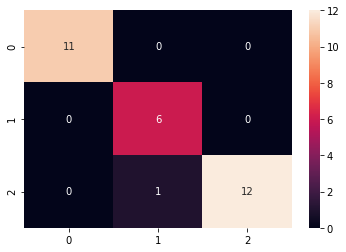

In [32]:
sns.heatmap(confusion_matrix(y_test,knn_predictions_test),annot=True);

In [33]:
print(classification_report(y_test,knn_predictions_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.86      1.00      0.92         6
           2       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



## Support Vector Classifier

In [34]:
svc = SVC()
svc.fit(X_train,y_train)
svc_predictions_train = svc.predict(X_train)
svc_predictions_test = svc.predict(X_test)
print("Accuracy of Support Vector Classifier train set : ",accuracy_score(y_train,svc_predictions_train))
print("Accuracy of Support Vector Classifier test set : ",accuracy_score(y_test,svc_predictions_test))

Accuracy of Support Vector Classifier train set :  0.9583333333333334
Accuracy of Support Vector Classifier test set :  1.0


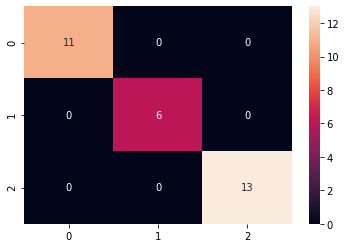

In [35]:
sns.heatmap(confusion_matrix(y_test,svc_predictions_test),annot=True);

In [36]:
print(classification_report(y_test,svc_predictions_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

